# Task 6: K-Nearest Neighbors (KNN) Classification

### Objective: Understand and implement KNN for classification problems.

STEP 1: Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


STEP 2: Load the Dataset


I will use the Iris dataset for this task.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier understanding
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Display first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


STEP 3: Normalize the Features


KNN is distance-based, so normalization is very important.


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


STEP 4: Train the KNN Model


Let’s train a KNN classifier with K=3.

In [4]:
# Initialize the model with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

STEP 5: Test the Model and Check Accuracy


Let’s use the model to predict and evaluate its performance

Accuracy: 1.0


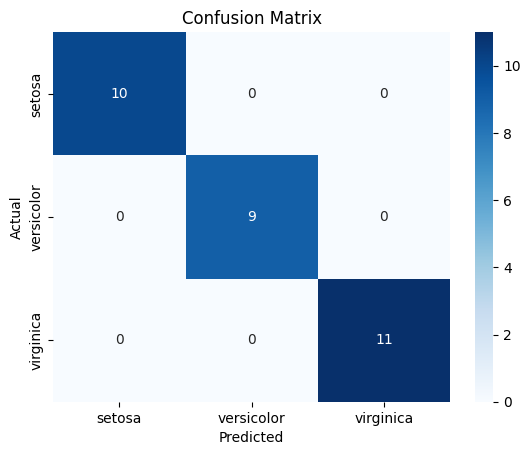

In [5]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


STEP 6: Experiment with Different Values of K


Let’s find the best K by checking accuracy for values from 1 to 10.

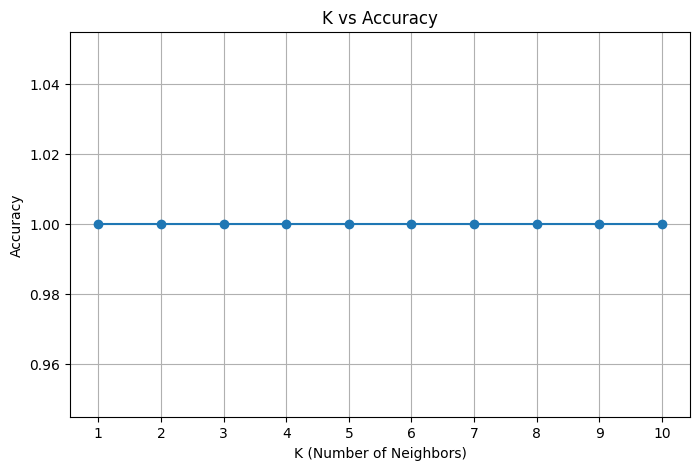

In [6]:
# Try different values of K and store accuracy
accuracy_scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), accuracy_scores, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


STEP 7: Visualize Decision Boundaries (Using only 2 features)


I will use just the first two features of the Iris dataset:

sepal length (cm) and sepal width (cm).



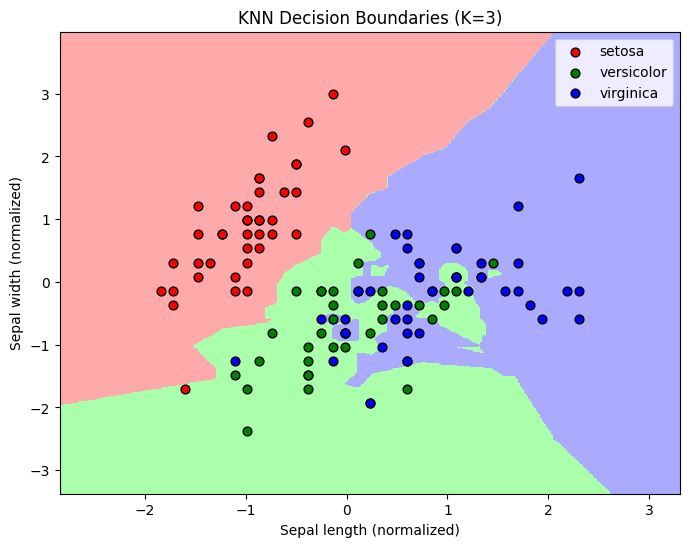

In [7]:
# Use only 2 features for visualization
X_vis = X[:, :2]

# Split and normalize
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.2, random_state=42)
scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)
X_test_v = scaler_v.transform(X_test_v)

# Train KNN with K=3
knn_v = KNeighborsClassifier(n_neighbors=3)
knn_v.fit(X_train_v, y_train_v)

# Plot decision boundaries
from matplotlib.colors import ListedColormap

h = .02  # step size in mesh
x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_v.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Scatter the training points
for idx, color in enumerate(cmap_bold):
    plt.scatter(X_train_v[y_train_v == idx, 0], X_train_v[y_train_v == idx, 1],
                c=color, label=iris.target_names[idx], edgecolor='k', s=40)

plt.xlabel('Sepal length (normalized)')
plt.ylabel('Sepal width (normalized)')
plt.title('KNN Decision Boundaries (K=3)')
plt.legend()
plt.show()
